#### Copyright © 2023 Taeyoung Kim and Mingi Kang. All rights reserved. ####

This is the solution for the homework assignment of the Machine Learning and Optimization lecture for WS2023. 

In [1]:
import csv


import numpy as np
from matplotlib import pyplot as plt

from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
X = np.loadtxt('nuclear/nuclear_x.csv', delimiter=',')
y = np.loadtxt('nuclear/nuclear_y.csv', delimiter=',', dtype=int)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class LinearSGDClassifier:
    def __init__(self, learning_rate_func, batch_size=1, regularization=0.001, max_iter=100):
        self.learning_rate_func = learning_rate_func
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_iter = max_iter
        self.weights = None
        self.intercept = None
        self.weights_history = []
        self.intercepts_history = []
            
    def _hinge_gradient(self, data, target):
        margin = (data @ self.weights + self.intercept) * target
        hinge_condition = margin <= 1
        gradient_weights = -(target[hinge_condition, None] * data[hinge_condition, :]).sum(0)
        gradient_intercept = -target[hinge_condition].sum()
        return gradient_weights, gradient_intercept

    def fit(self, data, target):
        n_samples, n_features = data.shape
        self.weights = np.zeros(n_features)
        self.intercept = 0

        for iteration in range(1, self.max_iter + 1):
            learning_rate = self.learning_rate_func(iteration)
            for batch_start in range(0, n_samples, self.batch_size):
                batch_indices = np.random.choice(n_samples, self.batch_size, replace=False)
                grad_w, grad_b = self._hinge_gradient(data[batch_indices], target[batch_indices])
                grad_w += self.regularization * self.weights
                self.weights -= learning_rate * grad_w / n_samples
                self.intercept -= learning_rate * grad_b / n_samples

            self.weights_history.append(self.weights.copy())
            self.intercepts_history.append(self.intercept)

    def compute_cost(self, data, target):
        cost_values = []
        for weights, intercept in zip(self.weights_history, self.intercepts_history):
            margin = data @ weights + intercept
            hinge_loss = np.maximum(1 - margin * target, 0)
            cost = hinge_loss.mean() + self.regularization / 2 * np.linalg.norm(weights) ** 2
            cost_values.append(cost)
        return cost_values

In [6]:

# Initialize and fit the model
data_matrix = X
target = y
learning_rate_func = lambda j: 100 / j
model = LinearSGDClassifier(learning_rate_func, batch_size=data_matrix.shape[0], max_iter=50)
model.fit(data_matrix, target)
cost_values = model.compute_cost(data_matrix, target)

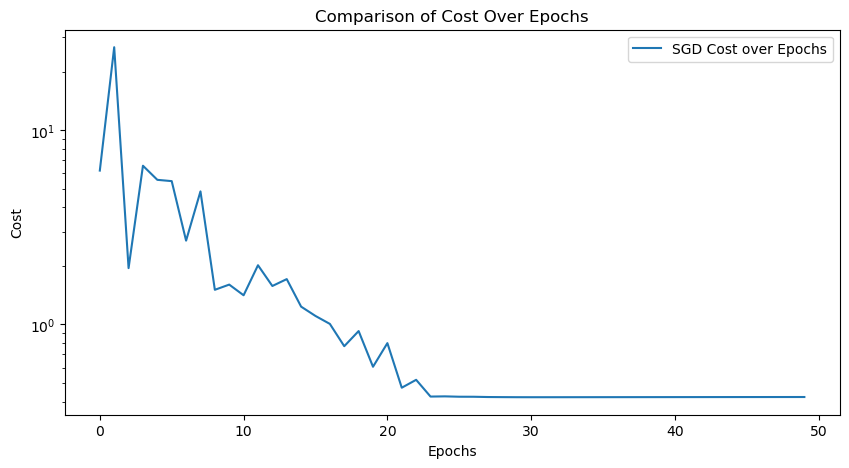

In [7]:
# Plotting cost over epochs
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(cost_values)), cost_values, label='SGD Cost over Epochs')
# plt.plot(...) # Add the plot for Stochastic SGD here if you have the data
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Comparison of Cost Over Epochs')
plt.legend()
plt.show()

/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_64566/3335178514.py:19: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', edgecolors='red', alpha=0.1)


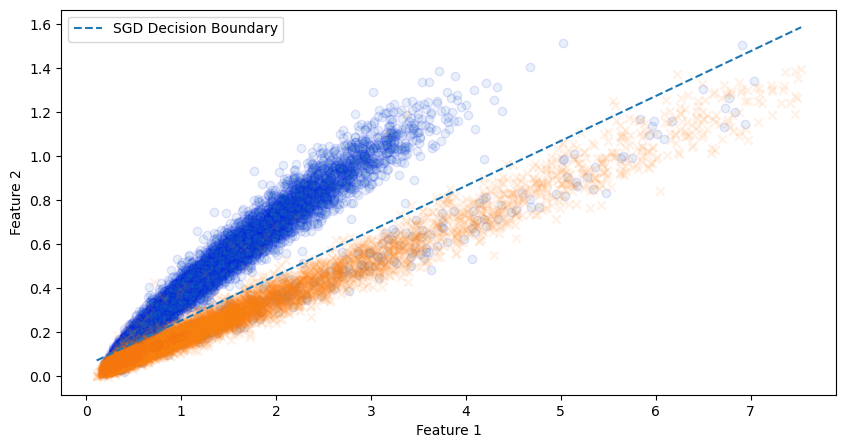

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot the decision boundary
def plot_decision_boundary(weights, intercept, x_min, x_max, style, label):
    y_min = -(x_min * weights[0] + intercept) / weights[1]
    y_max = -(x_max * weights[0] + intercept) / weights[1]
    plt.plot([x_min, x_max], [y_min, y_max], style, label=label)

# Assuming you have final weights and bias from your model
weights_sgd = model.weights
intercept_sgd = model.intercept

# Plotting data points
plt.figure(figsize=(10, 5))
positive_class = data_matrix[target == 1]
negative_class = data_matrix[target == -1]
plt.scatter(positive_class[:, 0], positive_class[:, 1], marker='o', edgecolors='blue', alpha=0.1)
plt.scatter(negative_class[:, 0], negative_class[:, 1], marker='x', edgecolors='red', alpha=0.1)

# Finding the range for the x-axis
x_min, x_max = data_matrix[:, 0].min(), data_matrix[:, 0].max()

# Plotting decision boundary
plot_decision_boundary(weights_sgd, intercept_sgd, x_min, x_max, '--', 'SGD Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
